In [ ]:
# Import all desired modules / packages that you plan to use here (e.g. numpy, matplotlib.pyplot)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")

# Function definitions

Normally, one would be strongly advised to write functions one intends to use often in a separate Python file called a **module**.  This module could then be imported in the same way that numpy or other packages would be imported, and the functions would then be callable from the notebook.  In this class, we'll be writing a single notebook that contains all project elements simply for grading convenience, but you are strongly encourage to learn about modules on your own.

In [ ]:
# All user-defined functions should be specified here.  Every function should have a docstring

def dynamics_solve(f, D = 1, t_0 = 0.0, s_0 = 1, h = 0.1, N = 100, method = "Euler"):
    
    """ Solves for dynamics of a given dynamical system
    
    - User must specify dimension D of phase space.
    - Includes Euler, RK2, RK4, that user can choose from using the keyword "method"
    
    Args:
        f: A python function f(t, s) that assigns a float to each time and state representing
        the time derivative of the state at that time.
        
    Kwargs:
        D: Phase space dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        s_0: Initial state (float for D=1, ndarray for D>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4"
    
    Returns:
        T: Numpy array of times
        S: Numpy array of states at the times given in T
    """
    
    T = np.array([t_0 + n * h for n in range(N + 1)])
    
    if D == 1:
        S = np.zeros(N + 1)
    
    if D > 1:
        S = np.zeros((N + 1, D))
        
    S[0] = s_0
    
    if method == 'Euler':
        for n in range(N):
            S[n + 1] = S[n] + h * f(T[n], S[n])
    
    if method == 'RK2':
        for n in range(N):
            k1 = h * f(T[n],S[n])
            k2 = h * f(T[n]+0.5*h,S[n]+0.5*k1)
            S[n + 1] = S[n] + k2
    
    if method == 'RK4':
        for n in range(N):
            k1 = h * f(T[n],S[n])
            k2 = h * f(T[n]+0.5*h,S[n]+0.5*k1)
            k3 = h * f(T[n]+0.5*h,S[n]+0.5*k2)
            k4 = h * f(T[n]+h,S[n]+k3)
            S[n + 1] = S[n] + (1/6)*(k1+2*k2+2*k3+k4) 
            
    return T, S

def hamiltonian_solve(d_qH, d_pH, d = 1, t_0 = 0.0, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 100, method = "Euler"):
    
    """ Solves for dynamics of Hamiltonian system
    
    - User must specify dimension d of configuration space.
    - Includes Euler, RK2, RK4, Symplectic Euler (SE) and Stormer Verlet (SV) 
      that user can choose from using the keyword "method"
    
    Args:
        d_qH: Partial derivative of the Hamiltonian with respect to coordinates (float for d=1, ndarray for d>1)
        d_pH: Partial derivative of the Hamiltonian with respect to momenta (float for d=1, ndarray for d>1)
        
    Kwargs:
        d: Spatial dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        q_0: Initial position (float for d=1, ndarray for d>1) set to 0.0 as default
        p_0: Initial momentum (float for d=1, ndarray for d>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4", "SE", "SV"
    
    Returns:
        T: Numpy array of times
        Q: Numpy array of positions at the times given in T
        P: Numpy array of momenta at the times given in T
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    
    if d == 1:
        P = np.zeros(N+1)
        Q = np.zeros(N+1)
      
    
    if d > 1:
        Q = np.zeros((N + 1, d))
        P = np.zeros((N + 1, d))
    
    Q[0] = q_0
    P[0] = p_0
        
    if method == 'Euler':
        for n in range(N):
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
            P[n + 1] = P[n] - h * d_qH(Q[n], P[n])
    
    if method == 'RK2':
        for n in range(N):
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = h * (- d_qH(Q[n], P[n]))
            
            k2_Q = h * d_pH(Q[n] + .5 * h, P[n] + .5 * k1_Q)
            k2_P = -h * (d_qH(Q[n] + .5 * h, P[n] + .5 * k1_P))
            
            Q[n + 1] = Q[n] + k2_Q
            P[n + 1] = P[n] + k2_P
        
    if method == 'RK4':
        for n in range(N):
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = h * (- d_qH(Q[n], P[n]))

            k2_Q = h * d_pH(Q[n] + .5 * h, P[n] + .5 * k1_Q)
            k2_P = -h * (d_qH(Q[n] + .5 * h, P[n] + .5 * k1_P))

            k3_Q = h * d_pH(Q[n] + .5 * h, P[n] + .5 * k2_Q)
            k3_P = -h * d_qH(Q[n] + .5 * h, P[n] + .5 * k2_P)

            k4_Q =  h * d_pH(Q[n] + h, P[n] + k3_Q)
            k4_P =  -h * d_qH(Q[n] + h, P[n] + k3_P)

            Q[n+1] = Q[n] + (1/6) * (k1_Q + 2 * k2_Q + 2 * k3_Q + k4_Q)
            P[n+1] = P[n] + (1/6) * (k1_P + 2 * k2_P + 2 * k3_P + k4_P)

    if method == 'SE':
       for n in range(N):
           Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
           P[n + 1] = P[n] - h * d_qH(Q[n+1], P[n])
    
    if method == "SV":
       for n in range(N):
            P_half = P[n] - (h/2) * d_qH(Q[n], P[n])
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P_half)
            P[n + 1] = P_half - (h/2) * d_qH(Q[n+1], P[n])
        
    return T, Q, P
  
  
def f1(B,D):
  def inner_function(t,s):
    return (B-D)*s
  return inner_function

def p_exact(B,D,p0):
  def inner_function(t):
    return p0*np.exp((B-D)*t)
  return inner_function

def sho_d_qH(m ,w):
  def innerfunc(Q, P):
    return (m * w **2)* Q
  return innerfunc

def sho_d_pH(m ,w):
  def innerfunc(Q, P):
    return P/m
  return innerfunc

def sho_exact_q(m,w):
  def innerfunc(x0,p0,t,t0):
    x = x0*np.cos(w * (t-t0)) + (p0/(m*w))*np.sin(w * (t-t0))
    return x 
  return innerfunc

def sho_exact_p(m,w):
  def innerfunc(x0,p0,t,t0):
    p = p0*np.cos(w * (t-t0)) - m*w*x0*np.sin(w * (t-t0))
    return p
  return innerfunc

def f2(R,K):
  def innerFunction(t,P):
    return R*(1-(P/K))*P
  return innerFunction

def f3(R, K, C, P_c):
  def innerfunc(t,P):
    return R * (1-P/K)*P - C*((P**2)/(P_c**2 + P**2))
  return innerfunc

def kepler_d_pH(m1,m2):
  mu = m1*m2/(m1+m2)
  def innerFunc(Q,P):
    q_x_dot = P[0]/mu
    q_y_dot = P[1]/mu
    return np.array([q_x_dot,q_y_dot])
  return innerFunc
  
def kepler_d_qH(m1,m2):
  k = G*m1*m2
  def innerFunc(Q,P):
    p_x_dot = Q[0]*k/((Q[0]**2 + Q[1]**2)**(3/2))
    p_y_dot = Q[1]*k/((Q[0]**2 + Q[1]**2)**(3/2))
    return np.array([p_x_dot,p_y_dot])
  return innerFunc

def J(Q,P):
  j_vals = np.zeros(Q.shape[0])
  for i in range(Q.shape[0]):
    j_vals[i] = Q[i][0]*P[i][1] - Q[i][1]*P[i][0]
  return j_vals

def A(m1,m2,Q,P,J):
  mu = m1*m2/(m1+m2)
  k = G*m1*m2
  
  A_x_list = np.zeros(Q.shape[0])
  A_y_list = np.zeros(Q.shape[0])
  
  for i in range(Q.shape[0]):
    A_x_list[i] = P[i][1]*J[i] - mu*k*(Q[i][0]/((Q[i][0]**2 + Q[i][1]**2)**(1/2)))
    A_y_list[i] = -P[i][0]*J[i] - mu*k*(Q[i][1]/((Q[i][0]**2 + Q[i][1]**2)**(1/2)))
    
  return A_x_list, A_y_list

# Function tests

Describe first the suite of tests you intend to do to ensure that your functions are working properly, then in code cells below, execute the tests, and comment on how you know the tests were passed.

1. For our code tests we shall do as the professor suggests. To begin, we will demonstrate that so long as the step size is chosen to be "sufficently small" (to be explianed shortly) the numerical solution (plotted in green) can be made to arbitarily close to the exact solution (plotted in red). To do this we will plot both the exact and numerical solutions, for a given set of conditions, for various step sizes, for each method under consideration (Euler, RK2, RK4). 

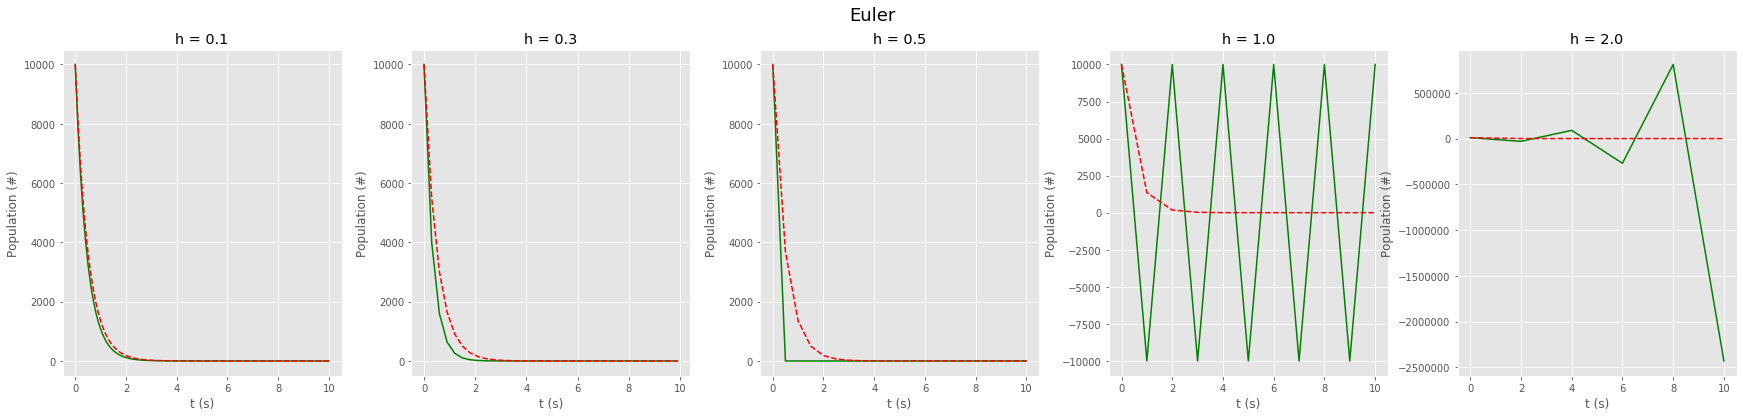

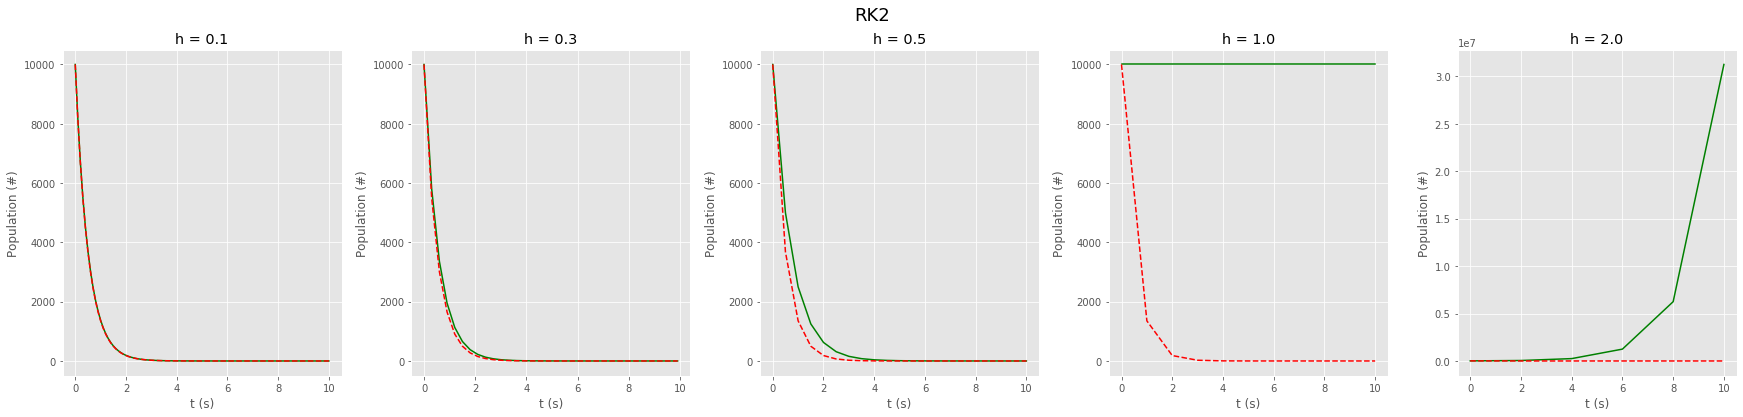

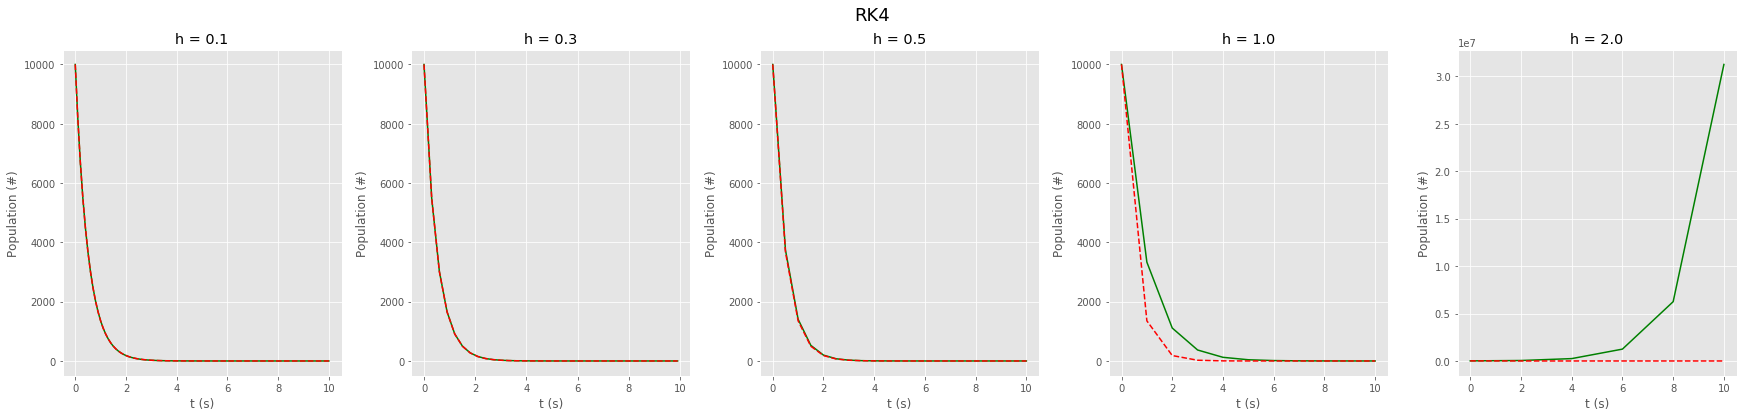

In [ ]:
B = 4
D = 6
p0 = 10000

t0 = 1/(B-D)

t_max = 10
methods = np.array(["Euler","RK2","RK4"])
h_steps = np.array([.1,.3,.5,1,2])

for i in range(3):
  fig,axs = plt.subplots(1,h_steps.size,figsize=(30,6))
  fig.suptitle(methods[i],fontsize=18)
  fig.subplots_adjust(hspace=.2,wspace=.25)
  
  for j in range(h_steps.size):
    
    T,S = dynamics_solve(f1(B,D), D = 1, t_0 = 0.0, s_0 = p0, h = h_steps[j], N=int(t_max/h_steps[j]) , method = methods[i])
    p = p_exact(B,D,p0)(T)
    
    axs[j].plot(T,S,color="green",linestyle="-")
    axs[j].plot(T,p,color="red",linestyle="--")
    axs[j].set(title="h = " + str(h_steps[j]),xlabel="t (s)",ylabel= "Population (#)")    

In the context of this system, "sufficently small" means smaller than the natural time scale of the system. In the case of this simple population model the natural time scale of the system is $T = \frac{1}{B-D}$. This is the reciprocal of the constant term in the exponent in the exact solution for the system.  

In this particular example, $B = 4$ and $D = 6$, so the natural time scale of the system is $T = 0.5$. From the above plots, we can see that so long as the step size is less than $T$ the exact and numerical solutions for the system are very close to one another for all of the tested methods. Thus, we can say that so long as the step size is "sufficently small", that is the step size is less than $T$, the simulations work well.


Next, we wish to show that each of the previously tested methods exhibit the correct order. Recall that Euler's method is first order, RK2 is second order, and RK4 is fourth order.  

One way to show the order for a particular numerical method is to do a log-log plot of the step size against the global truncation error produced by that method, for particular step size. Then the slope of the line produced by the log-log plot is the order of the method.  

This works because we expect for each method that the step size and global truncation error for that step size to be related by some sort of power relation, $y = a x^{k}$, where $k$ is the order of the method. Taking the logarithm of both sides we get: $\log(y) = k \log(x) + \log(a)$. Setting $Y = \log(Y)$, $X = \log(x)$, $b = \log(a)$ we get  $Y = k X + b$, which is the equation of a line with slope $k$.

Euler slope: 0.9617421876846335
RK2 slope: 2.017867439732014
RK4 slope: 3.9663822502686776


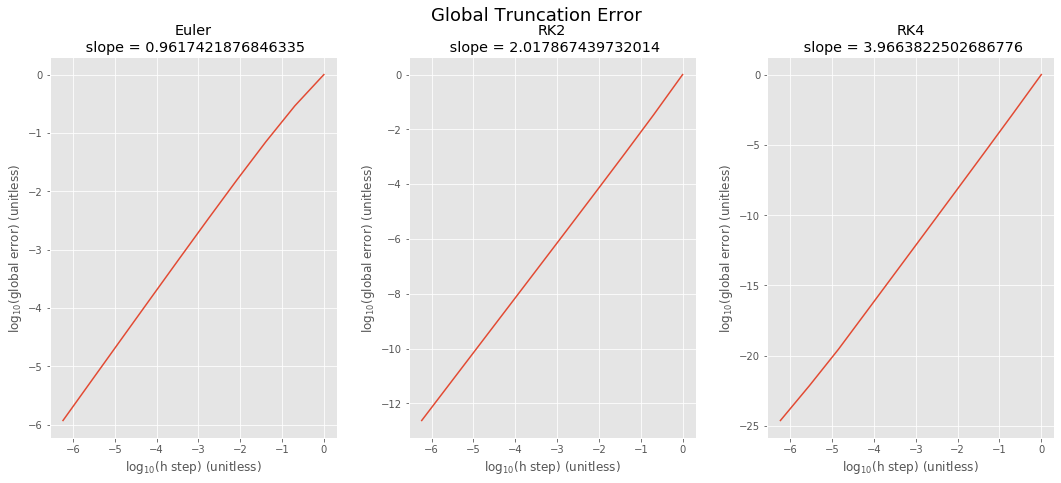

In [ ]:
B  = 5
D = 7
p0 = 1000

natural_scale = np.abs(1/(B-D))

methods = ["Euler","RK2","RK4"]

t_max = 5

h_step = np.zeros(10)
h_step[0] = 1/12

for i in range(h_step.size):
  if i > 0:
    h_step[i] = h_step[i-1]/2
  
#h_step = np.array([1/6,1/12,1/24,1/48,1/96,1/192,1/384])

slope_list = np.zeros(h_step.size)
err_list = np.zeros(h_step.size)

fig,ax = plt.subplots(1,3,figsize=(18,7))
fig.suptitle("Global Truncation Error",fontsize=18)
fig.subplots_adjust(hspace=.2,wspace=.25)

for i in range(len(methods)):
  for j in range(h_step.size):
    T,S = dynamics_solve(f1(B,D),s_0=p0,N=int(t_max/h_step[j]),h=h_step[j],method=methods[i])

    t_final = T[T.size-1]
    p_approx = S[T.size-1]
    p_actual = p_exact(B,D,p0)(t_final)

    global_err = np.abs(p_actual - p_approx)

    err_list[j] = global_err
     
  slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(h_step/h_step[0]),np.log(err_list/err_list[0]))
  print(methods[i]+ " slope: " + str(slope))
  ax[i].plot(np.log(h_step/h_step[0]),np.log(err_list/err_list[0]))
  ax[i].set(title=methods[i] + "\n slope = " + str(slope),xlabel="$\log_{10}$(h step) (unitless)",ylabel="$\log_{10}$(global error) (unitless)")

From the above example we can find the slope of the lines using a linear regression in Scipy. The slopes of the lines are as follows:
* Euler's Method Slope = .96 $\approx$ 1
* RK2 Slope = 2.02 $\approx$ 2
* RK4 Slope = 3.97 $\approx$ 4  
These are very close to the theoretical orders of these numerical methods.

### Code tests: Harmonic Oscillator

2. Next, we will performace the suggested code tests using the harmonic oscillator as our system.

First we will show that over a fixed number of oscillations for a given set of inital data if the step size is made sufficently small relative to the period of the oscillator, then the numerical solutions (plotted in green) can be made to closely match the exact solution (plotted in red) for all of our numerical methods.

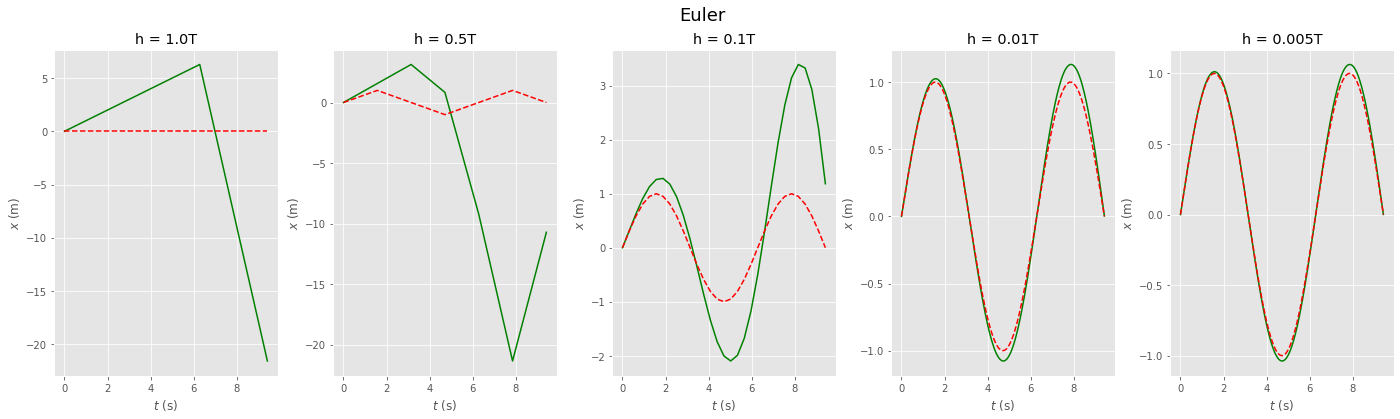

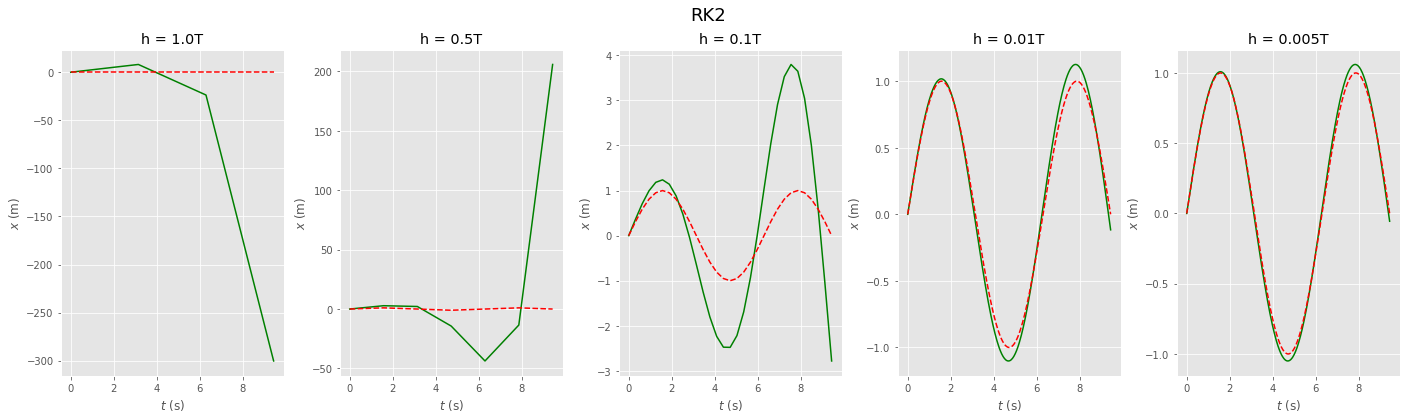

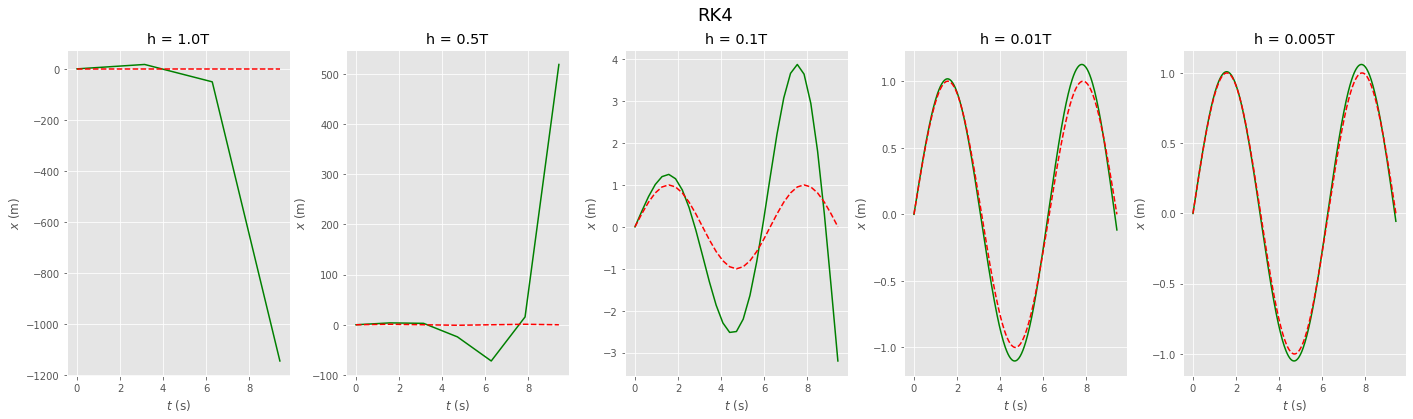

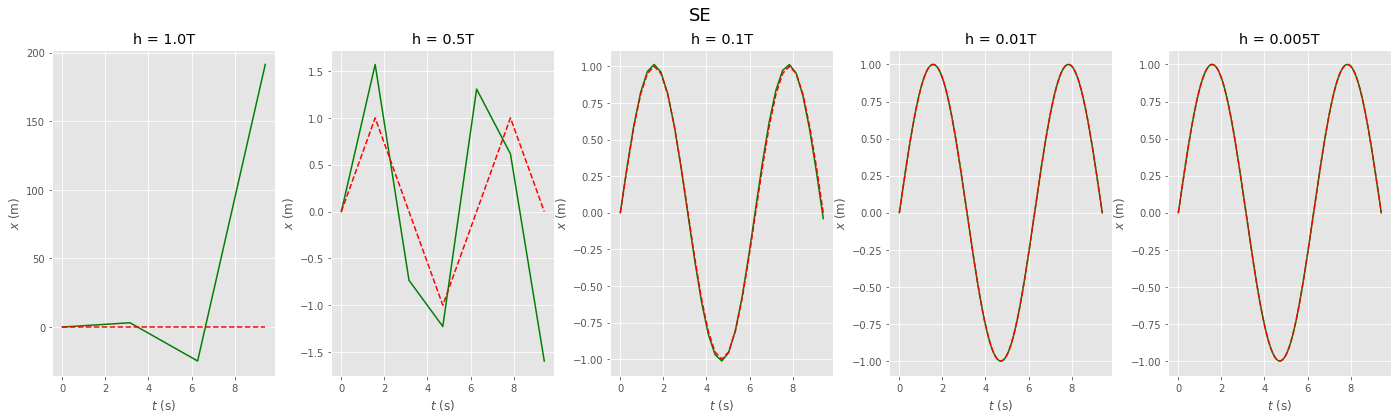

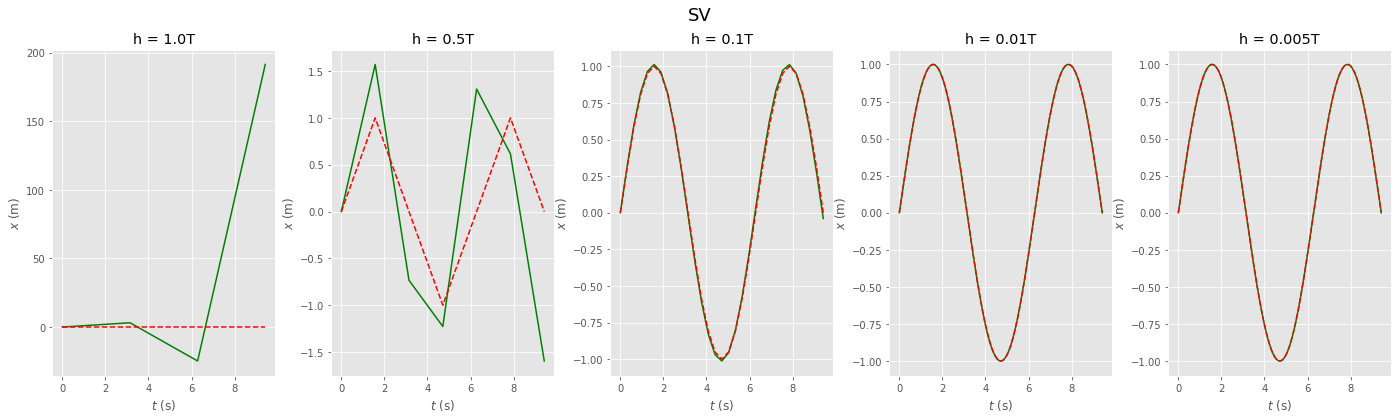

In [ ]:
m = 1
w = 1
t0 = 0
x0 = 0
p0 = 1

T = np.pi/w
n = 3
t_max = T*n

h_list = np.array([1,.5,.1,.01,.005])
h_vals = T*h_list
methods = np.array(["Euler","RK2","RK4","SE","SV"])

for i in range(methods.size):
  fig,ax = plt.subplots(1,h_vals.size,figsize=(24,6))
  fig.suptitle(methods[i],fontsize=18)
  fig.subplots_adjust(hspace=.2,wspace=.25)

  
  for j in range(h_vals.size):
    T,Q,P = hamiltonian_solve(sho_d_qH(m,w),sho_d_pH(m,w),h=h_vals[j],N=int(t_max/h_vals[j]),method=methods[i])
    x_exact = sho_exact_q(m,w)(x0,p0,T,t0)
    
    ax[j].plot(T,Q,color="green",linestyle="-")
    ax[j].plot(T,x_exact,color="red",linestyle="--")
    ax[j].set(title="h = " + str(h_list[j]) + "T",xlabel="$t$ (s)",ylabel="$x$ (m)")

As we can see from the above plots, as $h$ became smaller and smaller proportions of the period $T$ the numerical and exact solutions became very close to one another, as we wanted to show.

Next, we want to show that for a fixed step size if the number of oscillations plotted is sufficently large then all of the numerical methods will begin to deviate from the exact solution.

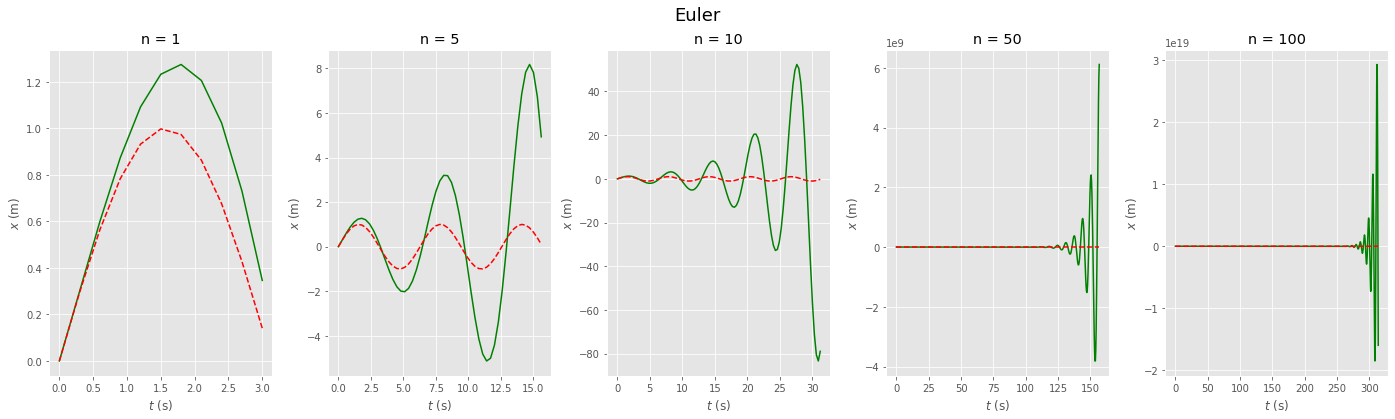

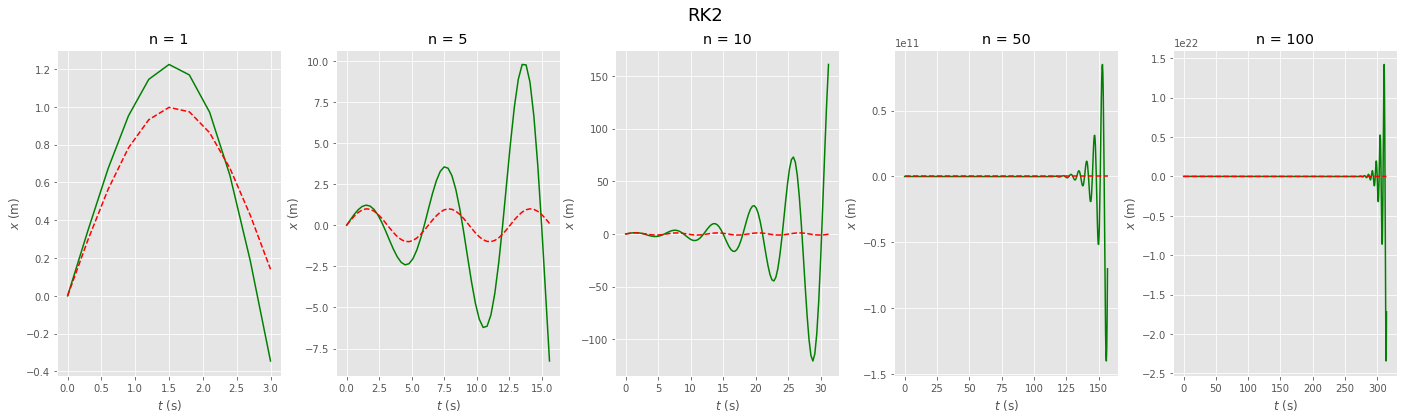

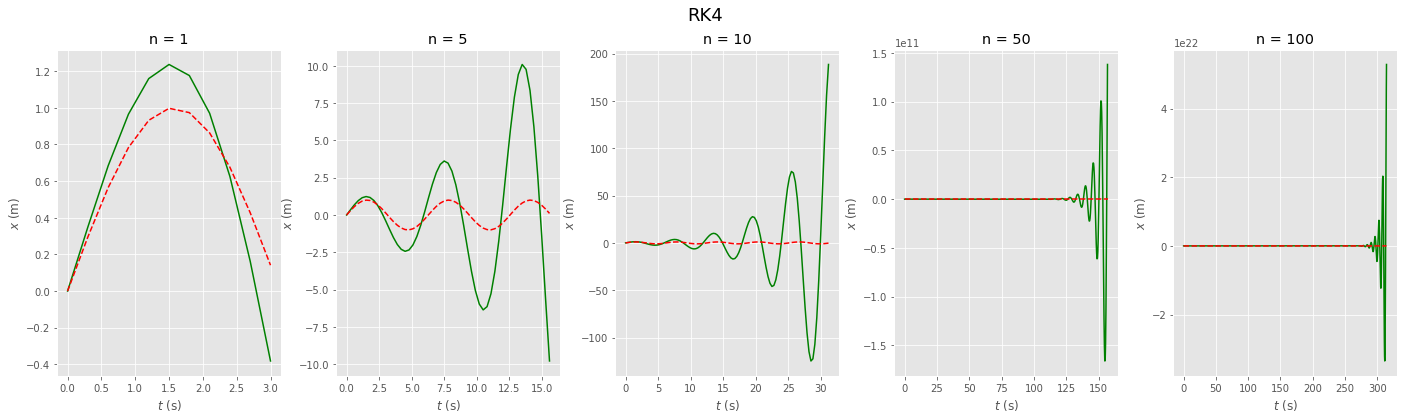

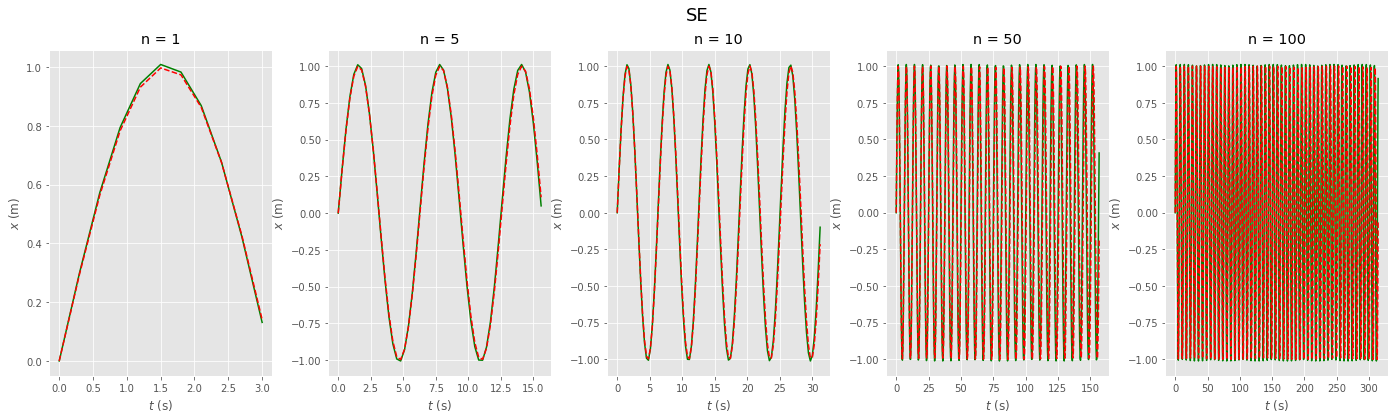

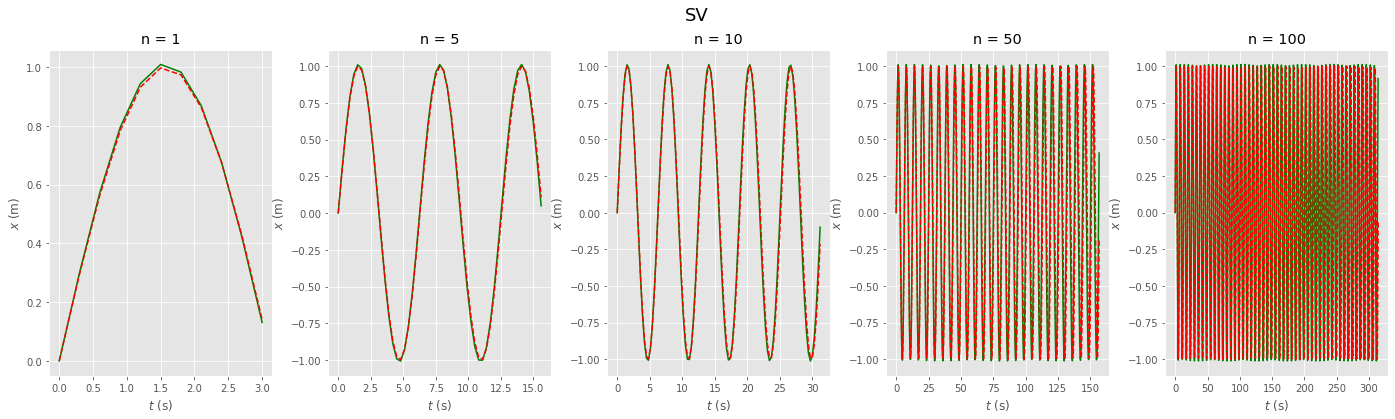

In [ ]:
m = 1
w = 1
t0 = 0
x0 = 0
p0 = 1

h_step = .3

T = np.pi/w
n_vals = np.array([1,5,10,50,100])
t_max = T*n_vals
methods = np.array(["Euler","RK2","RK4","SE","SV"])

for i in range(methods.size):
  fig,ax = plt.subplots(1,n_vals.size,figsize=(24,6))
  fig.suptitle(methods[i],fontsize=18)
  fig.subplots_adjust(hspace=.2,wspace=.25)

  
  for j in range(n_vals.size):
    T,Q,P = hamiltonian_solve(sho_d_qH(m,w),sho_d_pH(m,w),h=h_step,N=int(t_max[j]/h_step),method=methods[i])
    x_exact = sho_exact_q(m,w)(x0,p0,T,t0)
    
    ax[j].plot(T,Q,color="green",linestyle="-")
    ax[j].plot(T,x_exact,color="red",linestyle="--")
    ax[j].set(title="n = " + str(n_vals[j]),xlabel="$t$ (s)",ylabel="$x$ (m)")

As we can see from the above plots all of the numerical solutions do eventually deviate from the exact solutions when the step size is fixed. In the case of Euler, RK2, and RK4 this deviation is rather fast, becoming apparent within the first oscillation. For SE and SV the deviation is not so easy to see even after 100 oscillations. While the deviation is very slight (you might need a magnifying glass to see it) we can see that after 100 oscillations there is a slight amount of green poking out on the SE and SV plots, so we know that the numerical solution is a little bit off of the exact solution.  

The methods that deviate the most severely are Euler, RK2, and RK4, in that order. All of these methods begin to show their deviation at this step size within the first oscillation. On the other hand the SE and SV method show almost no deviation, even after 100 oscillations.  

The Runge-Kutta methods tend to deviate from the actual solution by increasing in amplitude as the number of oscillations increase. The Symplectic methods tend to deviate from the actual solution by having a slightly higher amplitude than the actual solution over all of the oscillations.

Note: I used a rather large step size in this example because if the step size is too small it becomes almost impossible to see when the SE and SV methods deviate from the exact solution.  



For each of the numerical methods the energy of the system tends to increase over time. This is evident from the above plots, as we can see $n$ increases (the number of oscillations increase) the amplitude of the numerical solution (green line) grows. In the actual solution to the harmonic oscillator the amplitude of the oscillations remain constant as the system does not lose any energy. While all of the methods show this unphysical increase in energy, in the Symplectic Euler and Stomer Verlet methods the increase in energy is very slight.

### A more general population model  
1. The function $f(t,P)$ has two roots, when $P=0$ and when $P=K$. If the population's value equals either of these roots at some moment in time then the population will remain that value for all times afterward.

1. When $P\in (0,K)$ the sign of $f(t,P(t))$ is positive (assuming $R >0$). This implies that the population is increasing.

1.  When $P\in (K,\infty)$ the sign of $f(t,P(t))$ is negative (assuming $R >0$). This implies that the population is decreasing.

1. 
  * If $P_{0} = 0$ then the population will never change, and forever be zero.
  * If the inital population is $0 < P_{0} < K$ then the populatiion initally increase until it reachs a value of $K$, where it will then remain constant.
  * If $P_{0} = K$ then the population will be never change and maintain a value of $K$ for all times.
  * If $P_{0} > K$ then the population will initally decrease until it reachs a value of $K$, where it will remain constant.

1. The constant $K$ represents the maximum value of the population that can be sustained indefinetly by the environment the population lives in. That is, $K$ is a stable population value.

1. Completed in the following cell!


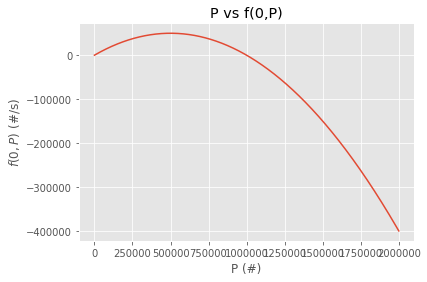

In [ ]:
R = .2
K = 10**6
t = 0

P_arr = np.linspace(0,2*10**6, 1000)

plt.plot(P_arr, f2(R,K)(t, P_arr))
plt.title("P vs f(0,P)")
plt.xlabel("P (#)")
plt.ylabel("$f(0,P)$ (#/s)")
plt.show()

The roots of the function $f(t,P)$ are indeed where I calculated them to be. From the above plot we can visually see the roots are at $P=0$ and $P=100000=K$, as they should be.

7. Plotted below!

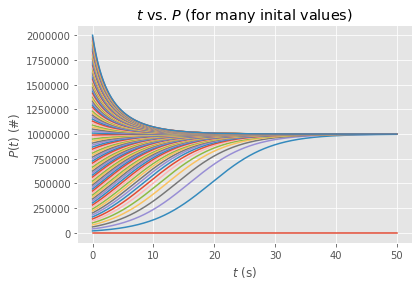

In [ ]:
R = .2
K = 10**6
t = 0

inital_pops = np.linspace(0,2*10**6,100)

for i in range(inital_pops.size):
  T,P = dynamics_solve(f2(R,K),s_0=inital_pops[i],h=.1,N=500,method="RK4")
  plt.plot(T,P)
  
plt.title("$t$ vs. $P$ (for many inital values)")
plt.xlabel("$t$ (s)")
plt.ylabel("$P(t)$ (#)")
plt.show()

8. Our numerical solutions do agree with our predictions. A characteristic of the numerical solutions I did not anticipate is how none of the numerical solutions seem to overlap each other. Each solution appears to be unqiue. 

### An even more general population model

1. We shall consider the following parameters for this problem:  
* $R = .2$ 
* $K = 1000$ 
* $C = 40$ 
* $P_{c} = 100$

In [ ]:
R = .2
K = 1000
C = 40
P_c = 100

2. The function is plotted below.

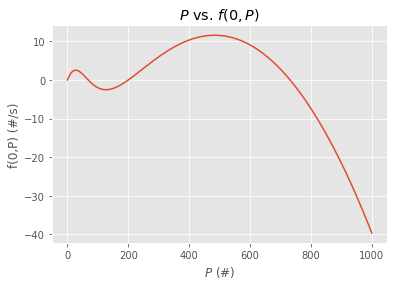

In [ ]:
t = 0
P = np.linspace(0,1000, 1000)
plt.plot(P, f3(R, K, C, P_c)(t,P))
plt.title("$P$ vs. $f(0,P)$")
plt.xlabel("$P$ (#)")
plt.ylabel("f(0,P) (#/s)")

def y(P):
  return f3(R, K, C, P_c)(t,P)

From the plot, we can visually see that the function has 4 real roots on the interval $P \in [0,1000]$.

3. The roots of $f$ in the variable $P$ are found below.

In [ ]:
from scipy.optimize import newton
t_arr = np.array([0, 50, 210, 700]) 
roots = newton(y, x0 = t_arr )
print(roots)

[  0.          68.33752096 200.         731.66247904]


The roots are:
* $P_{1} = 0$
* $P_{2} = 68.33752096$
* $P_{3} = 200$
* $P_{4} = 731.66247904$




4. The four regions are as follows:
* $R_{1} = (0,68.34)$ 
 - In this region the population increases.
* $R_{2} = (68.34,200)$ 
 - In this region the population decreases.
* $R_{3} = (200,731.66)$
 - In this region the population increases.
* $R_{4} = (731.66,1000)$
 - In this region the population decreases.
 
5. 
* If $P_{0} \in R1$ then the population will initally increase until it reaches a value of 68.34, after which it will remain this value for all future times.
* If $P_{0} \in R2$ then the population will initally decrease until it reacches a value of 68.34, after which it will remain this value for all future times.
* $P_{0} \in R3$ then the population will initally increase until it reaches a vlaue of 731.66, after which it will remain this value for all future times.
* $P_{0} \in R4$ then the population will initally decrease until it reacches a value of 731.66, after which it will remain this value for all future times.

These predictions are justified by the fact that we know the sign of $f(t,P)$ in each of the regions from question (2). Therefore, are able to determine whether or not the function will increase or decrease initally, before it hits a zero of $f(t,P)$.

6. Plotted below!

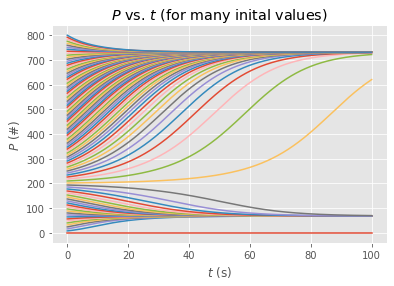

In [ ]:
inital_pops = np.linspace(0,800,100)

for i in range(inital_pops.size):
  T,P = dynamics_solve(f3(R, K, C, P_c),s_0=inital_pops[i],h=.1,N=1000,method="RK4")
  plt.plot(T,P)
  
plt.title("$P$ vs. $t$ (for many inital values)")
plt.xlabel("$t$ (s)")
plt.ylabel("$P$ (#)")
plt.show()

7. Our numerical solutions do agree with our predictions. Again, a characteristic of the numerical solutions I did not anticipate is how none of the numerical solutions seem to overlap each other. Each solution appears to be unqiue. It is also interesting to be able to see that $P=200$ is not a stable equalibrium point.

8. An attractor is a set of numerical values towards which a system tends to evolve for a wide variety of inital conditions of the system. A fixed point of a function is a point that is mapped to itself by the function (that is $f(x) = x$).   
For our population model the attractors of the system are the stable equalibrium points and the fixed points are the zeroes of $f(t,P)$.  
Here, $P_{2} = 68.34$ and $P_{4} = 731.66$ are attractors for the system (this can be seen very clearly from the above plot) and they are fixed points. The points $P_{1} = 0$ and $P_{3}=200$ are a fixed point for this system, but they are not attractors (again, this can be seen very clearly in the plot).

# Analysis of Physical System

Now, we will simulate the dynamics of the two-body problem.

First we need to set the inital conditions for this problem. We must choose the masses of our two bodies as well as the inital $(x_{0},y_{0})$ position and inital momentum $(p_{x_{0}},p_{y_{0}})$ of the reduced mass system. We shall do this in the following cell.

**Note**: For the following problem I was unable to produce an elliptical orbit for the two body system. I am not sure what the issue is as the SV method works for the harmonic oscillator test codes and I am able to show that the angular momentum and the Laplace-Runge-Lenz vector are conserved. I think it might be that my inital conditions are not sufficent for producing an elliptical orbit.

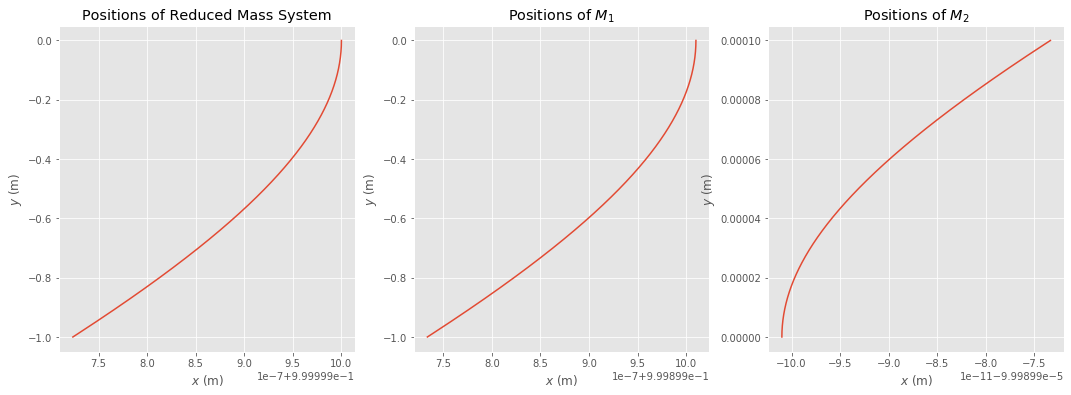

In [ ]:
import scipy.constants as const
G = const.G

m1 = 1
m2 = 10000

mu_1 = m2/(m1+m2)
mu_2 = -m1/(m1+m2)

T, Q, P = hamiltonian_solve(kepler_d_qH(m1,m2),kepler_d_pH(m1,m2),d=2,q_0=[1,0],p_0=[0,-1],N=1000,h=.001,method="SV")
  
r1 = mu_1*Q
r2 = mu_2*Q

fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].plot(Q[:,0],Q[:,1])
ax[0].set(title="Positions of Reduced Mass System",xlabel="$x$ (m)",ylabel="$y$ (m)")
ax[1].plot(r1[:,0],r1[:,1])
ax[1].set(title="Positions of $M_{1}$",xlabel="$x$ (m)",ylabel="$y$ (m)")
ax[2].plot(r2[:,0],r2[:,1])
ax[2].set(title="Positions of $M_{2}$",xlabel="$x$ (m)",ylabel="$y$ (m)")

#x_list=Q[:,0]
#y_list=Q[:,1]

#print(x_list)
#print(y_list)

#plt.plot(x_list,y_list)

plt.show()

The appropriate step size that will give reliable results is one that is small in comparison to the period of the orbit. This can be determined by trial and error by looking at the simulation results to see how long it takes the reducded mass system to return to the same position it started at.

At this point, it would be a good idea to make sure that quantities that should be conserved during this motion are indeed conserved by our simulation. According to the professor's notes, the angular momentum $J$ of the reduced mass system should be conserved as well as the Laplace-Runge-Lenz vector $A = (A_{x},A_{y}$).  


Computing the values of $J$ and $A$ throughout our simulation we find the following:

Angular Momentum values: [-1. -1. -1. ... -1. -1. -1.]
A_x component values: [0.99999933 0.99999933 0.99999933 ... 0.99999933 0.99999933 0.99999933]
A_y component values: [0.00000000e+00 1.66884997e-16 3.33767489e-16 ... 2.95826862e-14
 2.95383827e-14 2.94941157e-14]


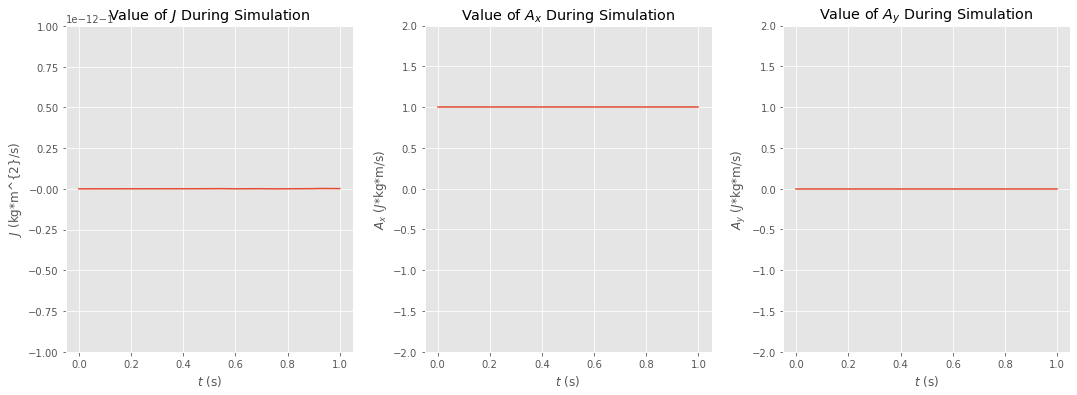

In [ ]:
j_vals = J(Q,P)
print("Angular Momentum values:", j_vals)

a_x_list,a_y_list = A(m1,m2,Q,P,j_vals)
print("A_x component values:", a_x_list)
print("A_y component values:", a_y_list)

fig,ax = plt.subplots(1,3,figsize=(18,6))
fig.subplots_adjust(hspace=.2,wspace=.25)
ax[0].plot(T,j_vals)
ax[0].set(title="Value of $J$ During Simulation",xlabel="$t$ (s)",ylabel="$J$ (kg*m^{2}/s)")
ax[1].plot(T,a_x_list)
ax[1].set_ylim(-2,2)
ax[1].set(title="Value of $A_{x}$ During Simulation",xlabel="$t$ (s)",ylabel="$A_{x}$ ($J$*kg*m/s)")
ax[2].plot(T,a_y_list)
ax[2].set_ylim(-2,2)
ax[2].set(title="Value of $A_{y}$ During Simulation",xlabel="$t$ (s)",ylabel="$A_{y}$ ($J$*kg*m/s)")
plt.show()

From the above plots we can see that the value of the $J$ and $A$ are approximently constant over the course of our simulation. Thus, these quantities are conserved during our simulation.  

While the plots do show some small amount of variation in the values of $J$ and $A$ during our simulation this they are small flucutations that can be attributed to round off error associated with machine precison.

Next, we will use simulations to show that the classical dynamics model of the two-body problem predict Kepler's Three Laws.

1. Kepler's first law of planetary motion is that the orbit of a planet is an ellipse with the sun at one of the two foci.

We can predict this law by showing that our simulation produces an elliptical orbit for the smaller mass with the larger mass positioned within that ellipse.

2. Kepler's second law of planetary motion is that a line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

This law can be derived using conservation of angular momentum, a quantity we have already shown to be conserved in our simulation. Thus, we have already shown that our simulation predicts Kepler's second law!

3. Kepler's third law of planetary motion is that the square of the orbital period, $T$, of a planet is directly proportional to the cube of the semi-major axis, $a$, of its orbit.

We can predict this law by showing that the ratio of $\frac{T^{2}}{a^{3}} = c$ for numerous orbits, where $c$ is some constant. The values of $T$ and $a$ can be determined through our simulation for each orbit inspected.